<a href="https://colab.research.google.com/github/Fermu25/Cursos/blob/main/Sensor_IR_prueba_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Archivo filtrado guardado como: prueba1_filtrado.csv


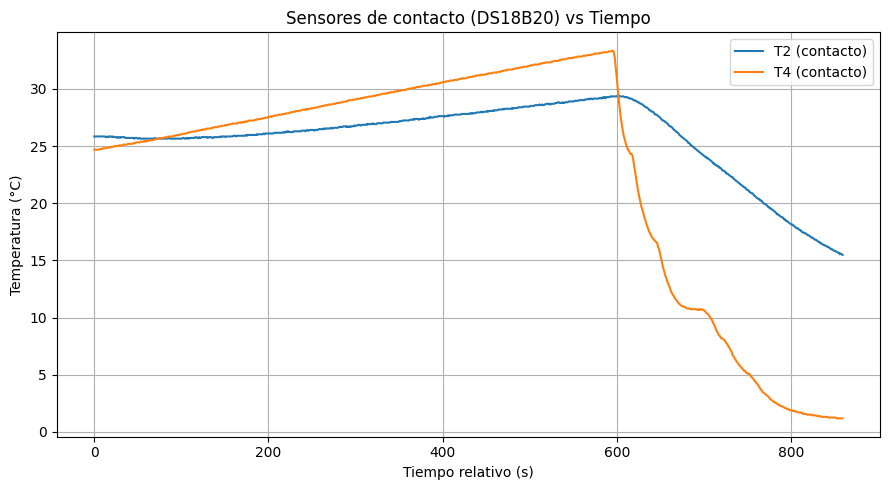

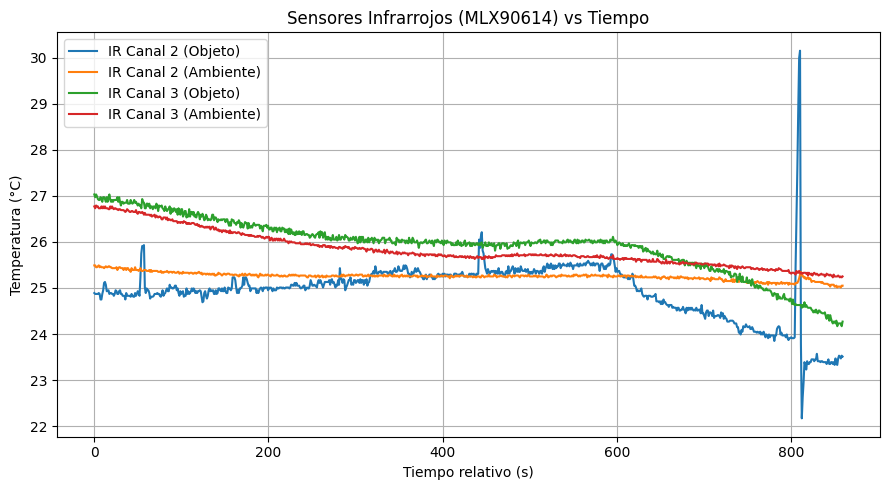

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# ---------- CONFIGURACIÓN ----------
input_file = "sensores_antes_de_las_calibraciones.csv"
output_file = "prueba1_filtrado.csv"  # Archivo de salida

# ---------- LECTURA Y PROCESAMIENTO ----------
with open(input_file, "r", encoding="utf-8") as f:
    lines = f.readlines()

data = []

# Expresiones regulares para extraer los valores
pat_line1 = re.compile(
    r"(\d+:\d+:\d+\.\d+).*?->\s*(\d+)\s*ms.*?T1:\s*([\d.]+).*?T2:\s*([\d.]+).*?T3:\s*([\d.]+).*?T4:\s*([\d.]+)"
)
pat_line2 = re.compile(
    r"IR Canal 2:\s*Obj=([\d.]+).*?Amb=([\d.]+).*?IR Canal 3:\s*Obj=([\d.]+).*?Amb=([\d.]+)"
)

for i in range(len(lines)):
    m1 = pat_line1.search(lines[i])
    if m1 and i + 1 < len(lines):
        m2 = pat_line2.search(lines[i + 1])
        if m2:
            time_str, ms, T1, T2, T3, T4 = m1.groups()
            Obj2, Amb2, Obj3, Amb3 = m2.groups()
            data.append({
                "Tiempo (ms)": int(ms),
                "T1 (°C)": float(T1),
                "T2 (°C)": float(T2),
                "T3 (°C)": float(T3),
                "T4 (°C)": float(T4),
                "IR2 Obj (°C)": float(Obj2),
                "IR2 Amb (°C)": float(Amb2),
                "IR3 Obj (°C)": float(Obj3),
                "IR3 Amb (°C)": float(Amb3),
            })

# Crear DataFrame
df = pd.DataFrame(data)

# Calcular tiempo relativo en segundos
df["Tiempo relativo (s)"] = (df["Tiempo (ms)"] - df["Tiempo (ms)"].iloc[0]) / 1000

# Reordenar columnas
cols = [
    "Tiempo relativo (s)",
    "T1 (°C)", "T2 (°C)", "T3 (°C)", "T4 (°C)",
    "IR2 Obj (°C)", "IR2 Amb (°C)", "IR3 Obj (°C)", "IR3 Amb (°C)"
]
df = df[cols]

# Guardar datos filtrados
df.to_csv(output_file, index=False)
print(f"Archivo filtrado guardado como: {output_file}")

# ---------- GRAFICAR ----------
plt.figure(figsize=(9,5))
#plt.plot(df["Tiempo relativo (s)"], df["T1 (°C)"], label="T1 (contacto)")
plt.plot(df["Tiempo relativo (s)"], df["T2 (°C)"], label="T2 (contacto)")
#plt.plot(df["Tiempo relativo (s)"], df["T3 (°C)"], label="T3 (contacto)")
plt.plot(df["Tiempo relativo (s)"], df["T4 (°C)"], label="T4 (contacto)")
plt.xlabel("Tiempo relativo (s)")
plt.ylabel("Temperatura (°C)")
plt.title("Sensores de contacto (DS18B20) vs Tiempo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(9,5))
plt.plot(df["Tiempo relativo (s)"], df["IR2 Obj (°C)"], label="IR Canal 2 (Objeto)")
plt.plot(df["Tiempo relativo (s)"], df["IR2 Amb (°C)"], label="IR Canal 2 (Ambiente)")
plt.plot(df["Tiempo relativo (s)"], df["IR3 Obj (°C)"], label="IR Canal 3 (Objeto)")
plt.plot(df["Tiempo relativo (s)"], df["IR3 Amb (°C)"], label="IR Canal 3 (Ambiente)")
plt.xlabel("Tiempo relativo (s)")
plt.ylabel("Temperatura (°C)")
plt.title("Sensores Infrarrojos (MLX90614) vs Tiempo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Archivo filtrado guardado como: prueba2_filtrado.csv


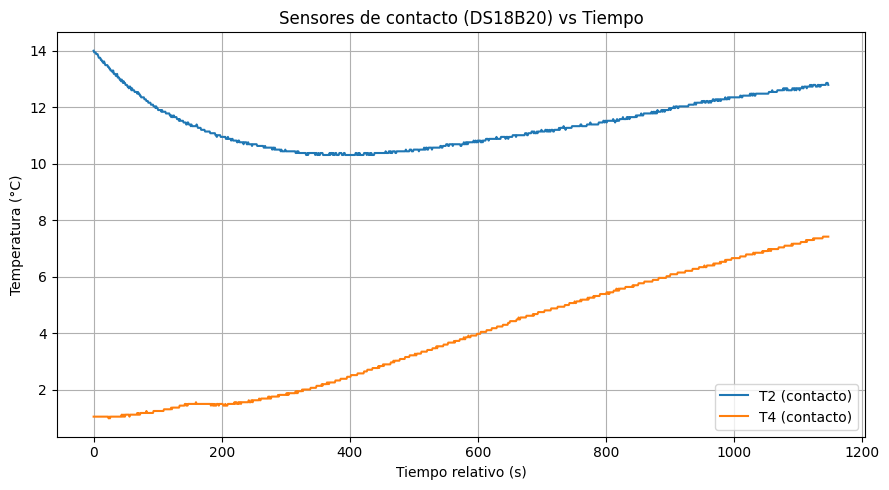

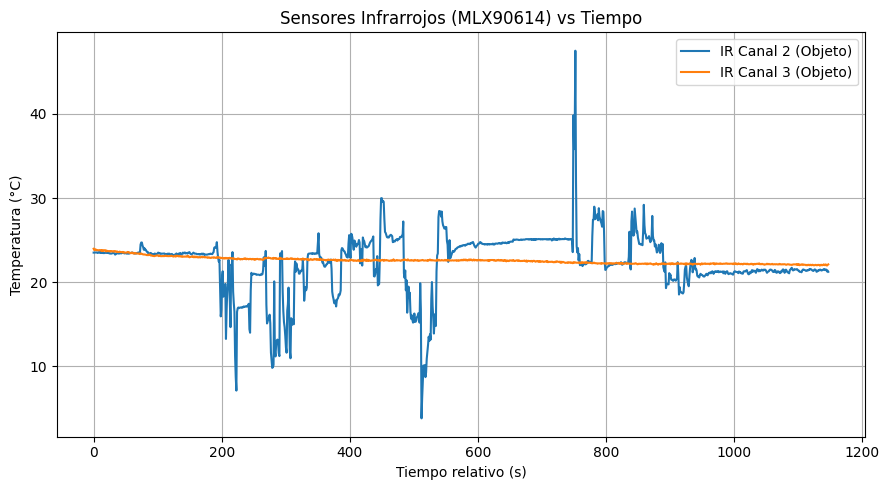

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# ---------- CONFIGURACIÓN ----------
input_file = "sensores_antes_de_las_calibraciones2.csv"
output_file = "prueba2_filtrado.csv"  # Archivo de salida

# ---------- LECTURA Y PROCESAMIENTO ----------
with open(input_file, "r", encoding="utf-8") as f:
    lines = f.readlines()

data = []

# Expresiones regulares para extraer los valores
pat_line1 = re.compile(
    r"(\d+:\d+:\d+\.\d+).*?->\s*(\d+)\s*ms.*?T1:\s*([\d.]+).*?T2:\s*([\d.]+).*?T3:\s*([\d.]+).*?T4:\s*([\d.]+)"
)
pat_line2 = re.compile(
    r"IR Canal 2:\s*Obj=([\d.]+).*?Amb=([\d.]+).*?IR Canal 3:\s*Obj=([\d.]+).*?Amb=([\d.]+)"
)

for i in range(len(lines)):
    m1 = pat_line1.search(lines[i])
    if m1 and i + 1 < len(lines):
        m2 = pat_line2.search(lines[i + 1])
        if m2:
            time_str, ms, T1, T2, T3, T4 = m1.groups()
            Obj2, Amb2, Obj3, Amb3 = m2.groups()
            data.append({
                "Tiempo (ms)": int(ms),
                "T1 (°C)": float(T1),
                "T2 (°C)": float(T2),
                "T3 (°C)": float(T3),
                "T4 (°C)": float(T4),
                "IR2 Obj (°C)": float(Obj2),
                "IR2 Amb (°C)": float(Amb2),
                "IR3 Obj (°C)": float(Obj3),
                "IR3 Amb (°C)": float(Amb3),
            })

# Crear DataFrame
df = pd.DataFrame(data)

# Calcular tiempo relativo en segundos
df["Tiempo relativo (s)"] = (df["Tiempo (ms)"] - df["Tiempo (ms)"].iloc[0]) / 1000

# Reordenar columnas
cols = [
    "Tiempo relativo (s)",
    "T1 (°C)", "T2 (°C)", "T3 (°C)", "T4 (°C)",
    "IR2 Obj (°C)", "IR2 Amb (°C)", "IR3 Obj (°C)", "IR3 Amb (°C)"
]
df = df[cols]

# Guardar datos filtrados
df.to_csv(output_file, index=False)
print(f"Archivo filtrado guardado como: {output_file}")

# ---------- GRAFICAR ----------
plt.figure(figsize=(9,5))
#plt.plot(df["Tiempo relativo (s)"], df["T1 (°C)"], label="T1 (contacto)")
plt.plot(df["Tiempo relativo (s)"], df["T2 (°C)"], label="T2 (contacto)")
#plt.plot(df["Tiempo relativo (s)"], df["T3 (°C)"], label="T3 (contacto)")
plt.plot(df["Tiempo relativo (s)"], df["T4 (°C)"], label="T4 (contacto)")
plt.xlabel("Tiempo relativo (s)")
plt.ylabel("Temperatura (°C)")
plt.title("Sensores de contacto (DS18B20) vs Tiempo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(9,5))
plt.plot(df["Tiempo relativo (s)"], df["IR2 Obj (°C)"], label="IR Canal 2 (Objeto)")
#plt.plot(df["Tiempo relativo (s)"], df["IR2 Amb (°C)"], label="IR Canal 2 (Ambiente)")
plt.plot(df["Tiempo relativo (s)"], df["IR3 Obj (°C)"], label="IR Canal 3 (Objeto)")
#plt.plot(df["Tiempo relativo (s)"], df["IR3 Amb (°C)"], label="IR Canal 3 (Ambiente)")
plt.xlabel("Tiempo relativo (s)")
plt.ylabel("Temperatura (°C)")
plt.title("Sensores Infrarrojos (MLX90614) vs Tiempo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Archivo filtrado guardado como: prueba3_filtrado.csv


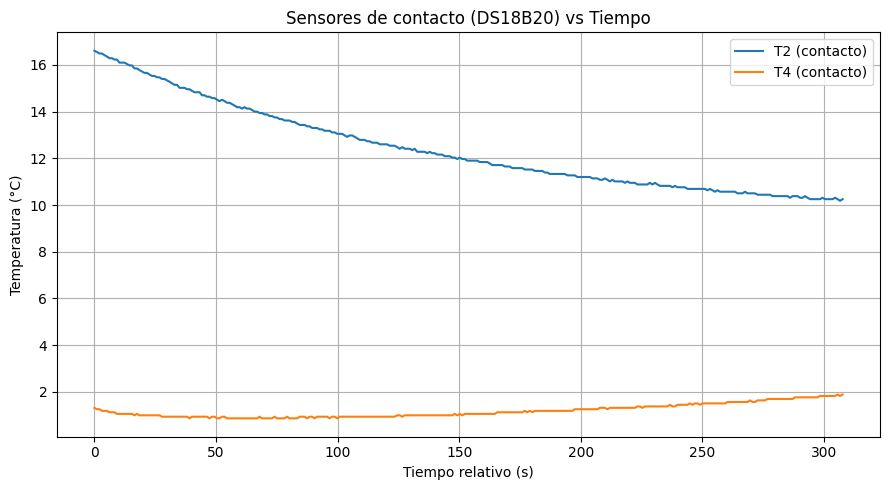

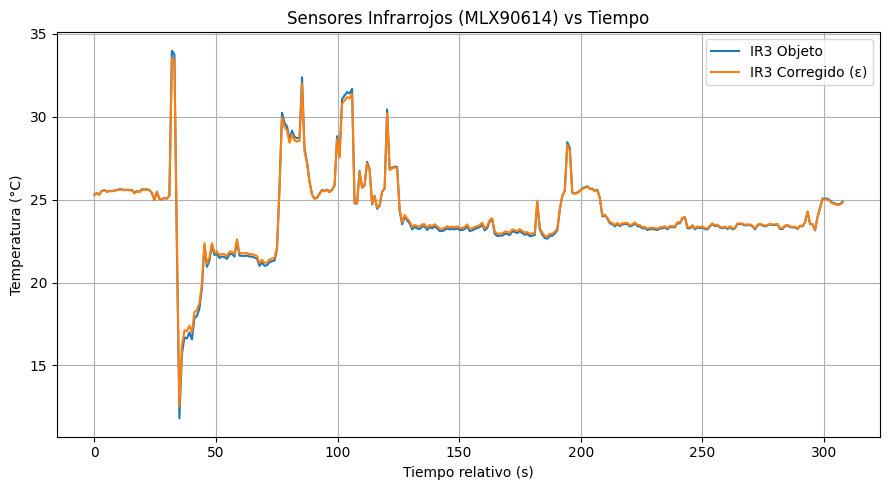

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# ---------- CONFIGURACIÓN ----------
input_file = "con_carcasa.csv"
output_file = "prueba3_filtrado.csv"

# ---------- LECTURA Y PROCESAMIENTO ----------
with open(input_file, "r", encoding="utf-8") as f:
    lines = f.readlines()

data = []

# Expresiones regulares
pat_line1 = re.compile(
    r"(\d+:\d+:\d+\.\d+).*?->\s*(\d+)\s*ms.*?T1:\s*([\d.]+).*?T2:\s*([\d.]+).*?T3:\s*([\d.]+).*?T4:\s*([\d.]+)"
)
pat_line2 = re.compile(
    r"IR Canal 2:\s*Obj=([\d.]+).*?Amb=([\d.]+).*?Obj_corr=([\d.]+).*?"
    r"IR Canal 3:\s*Obj=([\d.]+).*?Amb=([\d.]+).*?Obj_corr=([\d.]+)"
)

for i in range(len(lines)):
    m1 = pat_line1.search(lines[i])
    if m1 and i + 1 < len(lines):
        m2 = pat_line2.search(lines[i + 1])
        if m2:
            time_str, ms, T1, T2, T3, T4 = m1.groups()
            Obj2, Amb2, Obj_corr2, Obj3, Amb3, Obj_corr3 = m2.groups()
            data.append({
                "Tiempo (ms)": int(ms),
                "T1 (°C)": float(T1),
                "T2 (°C)": float(T2),
                "T3 (°C)": float(T3),
                "T4 (°C)": float(T4),
                "IR2 Obj (°C)": float(Obj2),
                "IR2 Amb (°C)": float(Amb2),
                "IR2 Corr (°C)": float(Obj_corr2),
                "IR3 Obj (°C)": float(Obj3),
                "IR3 Amb (°C)": float(Amb3),
                "IR3 Corr (°C)": float(Obj_corr3),
            })

# Crear DataFrame
df = pd.DataFrame(data)

# Calcular tiempo relativo en segundos
df["Tiempo relativo (s)"] = (df["Tiempo (ms)"] - df["Tiempo (ms)"].iloc[0]) / 1000

# Reordenar columnas
cols = [
    "Tiempo relativo (s)",
    "T1 (°C)", "T2 (°C)", "T3 (°C)", "T4 (°C)",
    "IR2 Obj (°C)", "IR2 Amb (°C)", "IR2 Corr (°C)",
    "IR3 Obj (°C)", "IR3 Amb (°C)", "IR3 Corr (°C)"
]
df = df[cols]

# Guardar CSV filtrado
df.to_csv(output_file, index=False)
print(f"Archivo filtrado guardado como: {output_file}")

# ---------- GRAFICAR ----------
plt.figure(figsize=(9,5))
#plt.plot(df["Tiempo relativo (s)"], df["T1 (°C)"], label="T1 (contacto)")
plt.plot(df["Tiempo relativo (s)"], df["T2 (°C)"], label="T2 (contacto)")
#plt.plot(df["Tiempo relativo (s)"], df["T3 (°C)"], label="T3 (contacto)")
plt.plot(df["Tiempo relativo (s)"], df["T4 (°C)"], label="T4 (contacto)")
plt.xlabel("Tiempo relativo (s)")
plt.ylabel("Temperatura (°C)")
plt.title("Sensores de contacto (DS18B20) vs Tiempo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(9,5))
#plt.plot(df["Tiempo relativo (s)"], df["IR2 Obj (°C)"], label="IR2 Objeto")
#plt.plot(df["Tiempo relativo (s)"], df["IR2 Amb (°C)"], label="IR2 Ambiente")
#plt.plot(df["Tiempo relativo (s)"], df["IR2 Corr (°C)"], label="IR2 Corregido (ε)")
plt.plot(df["Tiempo relativo (s)"], df["IR3 Obj (°C)"], label="IR3 Objeto")
#plt.plot(df["Tiempo relativo (s)"], df["IR3 Amb (°C)"], label="IR3 Ambiente")
plt.plot(df["Tiempo relativo (s)"], df["IR3 Corr (°C)"], label="IR3 Corregido (ε)")
plt.xlabel("Tiempo relativo (s)")
plt.ylabel("Temperatura (°C)")
plt.title("Sensores Infrarrojos (MLX90614) vs Tiempo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Archivo filtrado guardado como: prueba4_filtrado.csv


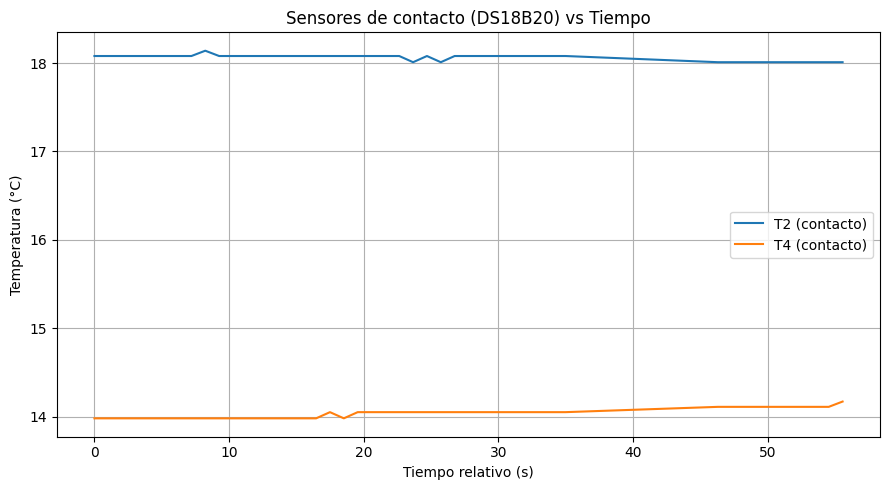

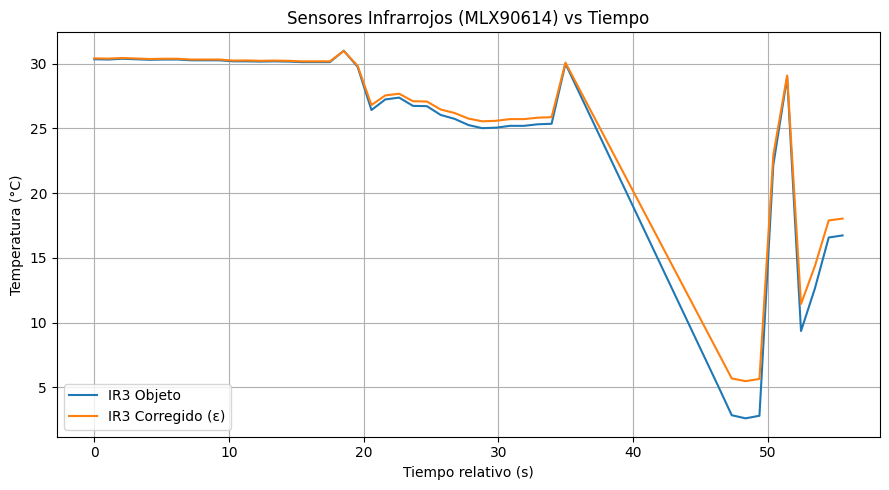

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# ---------- CONFIGURACIÓN ----------
input_file = "con_carcasa_y_sin_carcasa.csv"
output_file = "prueba4_filtrado.csv"

# ---------- LECTURA Y PROCESAMIENTO ----------
with open(input_file, "r", encoding="utf-8") as f:
    lines = f.readlines()

data = []

# Expresiones regulares
pat_line1 = re.compile(
    r"(\d+:\d+:\d+\.\d+).*?->\s*(\d+)\s*ms.*?T1:\s*([\d.]+).*?T2:\s*([\d.]+).*?T3:\s*([\d.]+).*?T4:\s*([\d.]+)"
)
pat_line2 = re.compile(
    r"IR Canal 2:\s*Obj=([\d.]+).*?Amb=([\d.]+).*?Obj_corr=([\d.]+).*?"
    r"IR Canal 3:\s*Obj=([\d.]+).*?Amb=([\d.]+).*?Obj_corr=([\d.]+)"
)

for i in range(len(lines)):
    m1 = pat_line1.search(lines[i])
    if m1 and i + 1 < len(lines):
        m2 = pat_line2.search(lines[i + 1])
        if m2:
            time_str, ms, T1, T2, T3, T4 = m1.groups()
            Obj2, Amb2, Obj_corr2, Obj3, Amb3, Obj_corr3 = m2.groups()
            data.append({
                "Tiempo (ms)": int(ms),
                "T1 (°C)": float(T1),
                "T2 (°C)": float(T2),
                "T3 (°C)": float(T3),
                "T4 (°C)": float(T4),
                "IR2 Obj (°C)": float(Obj2),
                "IR2 Amb (°C)": float(Amb2),
                "IR2 Corr (°C)": float(Obj_corr2),
                "IR3 Obj (°C)": float(Obj3),
                "IR3 Amb (°C)": float(Amb3),
                "IR3 Corr (°C)": float(Obj_corr3),
            })

# Crear DataFrame
df = pd.DataFrame(data)

# Calcular tiempo relativo en segundos
df["Tiempo relativo (s)"] = (df["Tiempo (ms)"] - df["Tiempo (ms)"].iloc[0]) / 1000

# Reordenar columnas
cols = [
    "Tiempo relativo (s)",
    "T1 (°C)", "T2 (°C)", "T3 (°C)", "T4 (°C)",
    "IR2 Obj (°C)", "IR2 Amb (°C)", "IR2 Corr (°C)",
    "IR3 Obj (°C)", "IR3 Amb (°C)", "IR3 Corr (°C)"
]
df = df[cols]

# Guardar CSV filtrado
df.to_csv(output_file, index=False)
print(f"Archivo filtrado guardado como: {output_file}")

# ---------- GRAFICAR ----------
plt.figure(figsize=(9,5))
#plt.plot(df["Tiempo relativo (s)"], df["T1 (°C)"], label="T1 (contacto)")
plt.plot(df["Tiempo relativo (s)"], df["T2 (°C)"], label="T2 (contacto)")
#plt.plot(df["Tiempo relativo (s)"], df["T3 (°C)"], label="T3 (contacto)")
plt.plot(df["Tiempo relativo (s)"], df["T4 (°C)"], label="T4 (contacto)")
plt.xlabel("Tiempo relativo (s)")
plt.ylabel("Temperatura (°C)")
plt.title("Sensores de contacto (DS18B20) vs Tiempo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(9,5))
#plt.plot(df["Tiempo relativo (s)"], df["IR2 Obj (°C)"], label="IR2 Objeto")
#plt.plot(df["Tiempo relativo (s)"], df["IR2 Amb (°C)"], label="IR2 Ambiente")
#plt.plot(df["Tiempo relativo (s)"], df["IR2 Corr (°C)"], label="IR2 Corregido (ε)")
plt.plot(df["Tiempo relativo (s)"], df["IR3 Obj (°C)"], label="IR3 Objeto")
#plt.plot(df["Tiempo relativo (s)"], df["IR3 Amb (°C)"], label="IR3 Ambiente")
plt.plot(df["Tiempo relativo (s)"], df["IR3 Corr (°C)"], label="IR3 Corregido (ε)")
plt.xlabel("Tiempo relativo (s)")
plt.ylabel("Temperatura (°C)")
plt.title("Sensores Infrarrojos (MLX90614) vs Tiempo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-3175667185.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Tiempo relativo (s)"] = pd.to_datetime(df["Tiempo"]) - pd.to_datetime(df["Tiempo"].iloc[0])


Archivo guardado como: temperaturas5.csv


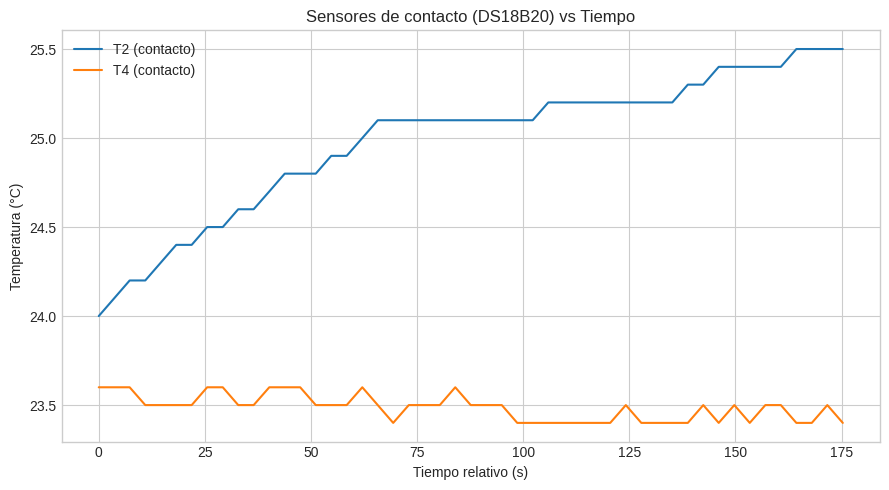

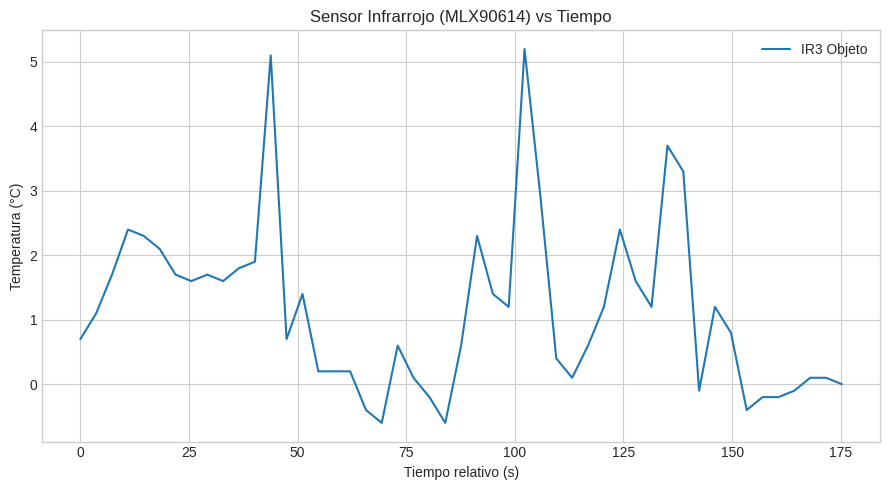

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# ---------- CONFIGURACIÓN ----------
input_file = "sensores_soporte_nuevo.csv"   # tu archivo de texto con formato mostrado
output_file = "temperaturas5.csv"

# ---------- LECTURA Y PROCESAMIENTO ----------
with open(input_file, "r", encoding="latin-1") as f:
    lines = f.readlines()

data = []

# Expresiones regulares
pat_time = re.compile(r"(\d+:\d+:\d+\.\d+)")
pat_ir3 = re.compile(r"IR Canal 3:\s*Obj\s*=\s*([\dnan.-]+).*?Amb\s*=\s*([\dnan.-]+)")
pat_ds18b20 = re.compile(
    r"DS18B20:\s*T1\s*=\s*([\d.]+).*?T2\s*=\s*([\d.]+).*?T3\s*=\s*([\d.]+).*?T4\s*=\s*([\d.]+)"
)

for i in range(len(lines)):
    line = lines[i]
    time_match = pat_time.search(line)
    ir3_match = pat_ir3.search(line)
    ds_match = pat_ds18b20.search(line)

    if time_match:
        current_time = time_match.group(1)
    if ir3_match:
        IR3_Obj, IR3_Amb = ir3_match.groups()
    if ds_match:
        T1, T2, T3, T4 = ds_match.groups()
        data.append({
            "Tiempo": current_time,
            "IR3 Obj (°C)": float(IR3_Obj) if IR3_Obj != "nan" else None,
            "IR3 Amb (°C)": float(IR3_Amb) if IR3_Amb != "nan" else None,
            "T1 (°C)": float(T1),
            "T2 (°C)": float(T2),
            "T3 (°C)": float(T3),
            "T4 (°C)": float(T4),
        })

# Crear DataFrame
df = pd.DataFrame(data)

# Calcular tiempo relativo (segundos)
df["Tiempo relativo (s)"] = pd.to_datetime(df["Tiempo"]) - pd.to_datetime(df["Tiempo"].iloc[0])
df["Tiempo relativo (s)"] = df["Tiempo relativo (s)"].dt.total_seconds()

# Guardar CSV filtrado
df.to_csv(output_file, index=False)
print(f"Archivo guardado como: {output_file}")

# ---------- GRAFICAR ----------
plt.style.use('seaborn-v0_8-whitegrid')

# --- Sensores de contacto ---
plt.figure(figsize=(9,5))
plt.plot(df["Tiempo relativo (s)"], df["T2 (°C)"], label="T2 (contacto)")
plt.plot(df["Tiempo relativo (s)"], df["T4 (°C)"], label="T4 (contacto)")
plt.xlabel("Tiempo relativo (s)")
plt.ylabel("Temperatura (°C)")
plt.title("Sensores de contacto (DS18B20) vs Tiempo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Sensor infrarrojo ---
plt.figure(figsize=(9,5))
plt.plot(df["Tiempo relativo (s)"], df["IR3 Obj (°C)"], label="IR3 Objeto")
#plt.plot(df["Tiempo relativo (s)"], df["IR3 Amb (°C)"], label="IR3 Ambiente")
plt.xlabel("Tiempo relativo (s)")
plt.ylabel("Temperatura (°C)")
plt.title("Sensor Infrarrojo (MLX90614) vs Tiempo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Archivo guardado como: temperaturas5.csv


/tmp/ipython-input-4281744286.py:49: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Tiempo relativo (s)"] = pd.to_datetime(df["Tiempo"]) - pd.to_datetime(df["Tiempo"].iloc[0])


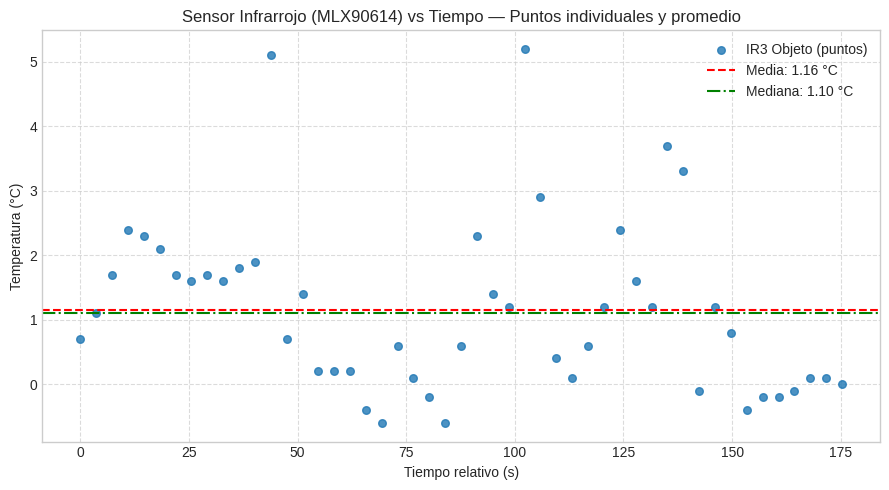

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

# ---------- CONFIGURACIÓN ----------
input_file = "sensores_soporte_nuevo.csv"   # tu archivo de texto con formato mostrado
output_file = "temperaturas5.csv"

# ---------- LECTURA Y PROCESAMIENTO ----------
with open(input_file, "r", encoding="latin-1") as f:
    lines = f.readlines()

data = []

# Expresiones regulares
pat_time = re.compile(r"(\d+:\d+:\d+\.\d+)")
pat_ir3 = re.compile(r"IR Canal 3:\s*Obj\s*=\s*([\dnan.-]+).*?Amb\s*=\s*([\dnan.-]+)")
pat_ds18b20 = re.compile(
    r"DS18B20:\s*T1\s*=\s*([\d.]+).*?T2\s*=\s*([\d.]+).*?T3\s*=\s*([\d.]+).*?T4\s*=\s*([\d.]+)"
)

for i in range(len(lines)):
    line = lines[i]
    time_match = pat_time.search(line)
    ir3_match = pat_ir3.search(line)
    ds_match = pat_ds18b20.search(line)

    if time_match:
        current_time = time_match.group(1)
    if ir3_match:
        IR3_Obj, IR3_Amb = ir3_match.groups()
    if ds_match:
        T1, T2, T3, T4 = ds_match.groups()
        data.append({
            "Tiempo": current_time,
            "IR3 Obj (°C)": float(IR3_Obj) if IR3_Obj != "nan" else None,
            "IR3 Amb (°C)": float(IR3_Amb) if IR3_Amb != "nan" else None,
            "T1 (°C)": float(T1),
            "T2 (°C)": float(T2),
            "T3 (°C)": float(T3),
            "T4 (°C)": float(T4),
        })

# Crear DataFrame
df = pd.DataFrame(data)

# Calcular tiempo relativo (segundos)
df["Tiempo relativo (s)"] = pd.to_datetime(df["Tiempo"]) - pd.to_datetime(df["Tiempo"].iloc[0])
df["Tiempo relativo (s)"] = df["Tiempo relativo (s)"].dt.total_seconds()

# Guardar CSV filtrado
df.to_csv(output_file, index=False)
print(f"Archivo guardado como: {output_file}")

# ---------- GRAFICAR SENSOR IR ----------
plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(9,5))

# Gráfico de puntos (scatter)
plt.scatter(df["Tiempo relativo (s)"], df["IR3 Obj (°C)"],
            label="IR3 Objeto (puntos)", color='tab:blue', s=30, alpha=0.8)

# Calcular estadísticos
mean_val = np.nanmean(df["IR3 Obj (°C)"])
median_val = np.nanmedian(df["IR3 Obj (°C)"])  # puedes cambiar por mediana o promedio general

# Líneas de referencia
plt.axhline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f"Media: {mean_val:.2f} °C")
plt.axhline(median_val, color='green', linestyle='-.', linewidth=1.5, label=f"Mediana: {median_val:.2f} °C")

# Configuración del gráfico
plt.xlabel("Tiempo relativo (s)")
plt.ylabel("Temperatura (°C)")
plt.title("Sensor Infrarrojo (MLX90614) vs Tiempo")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Archivo guardado como: temperaturas6.csv
Duración total: 1730.1 s (28.83 min)

=== Resultados por intervalo ===
Intervalo 1: 0.0 – 6.0 min → Media: 17.60 °C | Mediana: 17.40 °C
Intervalo 2: 6.0 – 14.0 min → Media: 5.69 °C | Mediana: 3.00 °C
Intervalo 3: 14.0 – 28.8 min → Media: 1.24 °C | Mediana: 1.30 °C


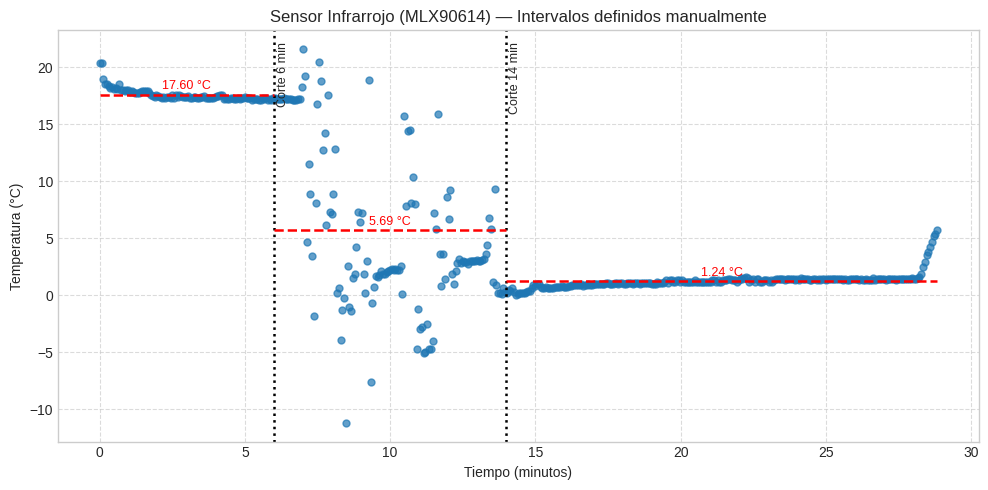

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
from datetime import datetime

# ---------- CONFIGURACIÓN ----------
input_file = "contacto_directo2.csv"
output_file = "temperaturas6.csv"

# 🔸 Define aquí tus cortes manuales (en minutos)
# Ejemplo: [5, 8, 12] generará 4 intervalos: 0–5, 5–8, 8–12 y 12–fin
cortes_min = [6,14]  # <<<<< cambia o añade más valores aquí
# Ejemplo: cortes_min = [6, 12, 20]

# ---------- LECTURA Y PROCESAMIENTO ----------
with open(input_file, "r", encoding="latin-1") as f:
    lines = f.readlines()

data = []
current_time = None
IR3_Obj, IR3_Amb = None, None

# Patrones regulares
pat_time = re.compile(r"(\d{2}:\d{2}:\d{2}\.\d{3})")
pat_ir3 = re.compile(r"IR Canal 3:\s*Obj\s*=\s*([\dnan.-]+)\s*°C,\s*Amb\s*=\s*([\dnan.-]+)\s*°C")
pat_ds18b20 = re.compile(
    r"DS18B20:\s*T1\s*=\s*([\d.-]+)\s*°C\s*\|\s*T2\s*=\s*([\d.-]+)\s*°C\s*\|\s*T3\s*=\s*([\d.-]+)\s*°C\s*\|\s*T4\s*=\s*([\d.-]+)\s*°C"
)

for line in lines:
    m_time = pat_time.search(line)
    if m_time:
        current_time = m_time.group(1)

    m_ir3 = pat_ir3.search(line)
    if m_ir3:
        IR3_Obj, IR3_Amb = m_ir3.groups()

    m_ds = pat_ds18b20.search(line)
    if m_ds and current_time:
        T1, T2, T3, T4 = m_ds.groups()
        data.append({
            "Tiempo": current_time,
            "IR3 Obj (°C)": float(IR3_Obj) if IR3_Obj != "nan" else np.nan,
            "IR3 Amb (°C)": float(IR3_Amb) if IR3_Amb != "nan" else np.nan,
            "T1 (°C)": float(T1),
            "T2 (°C)": float(T2),
            "T3 (°C)": float(T3),
            "T4 (°C)": float(T4),
        })

# ---------- CREACIÓN DEL DATAFRAME ----------
df = pd.DataFrame(data)

# Convertir tiempo a segundos y minutos
def to_seconds(t):
    dt = datetime.strptime(t, "%H:%M:%S.%f")
    return dt.hour * 3600 + dt.minute * 60 + dt.second + dt.microsecond / 1e6

df["Tiempo (s)"] = df["Tiempo"].apply(to_seconds)
df["Tiempo relativo (s)"] = df["Tiempo (s)"] - df["Tiempo (s)"].iloc[0]
df["Tiempo (min)"] = df["Tiempo relativo (s)"] / 60

# Guardar CSV
df.to_csv(output_file, index=False)
duracion = df["Tiempo relativo (s)"].iloc[-1]
print(f"Archivo guardado como: {output_file}")
print(f"Duración total: {duracion:.1f} s ({duracion/60:.2f} min)")

# ---------- DIVISIÓN EN INTERVALOS ----------
limites = [0] + cortes_min + [df["Tiempo (min)"].iloc[-1]]
resultados = []

for i in range(len(limites) - 1):
    t_ini, t_fin = limites[i], limites[i + 1]
    subset = df[(df["Tiempo (min)"] >= t_ini) & (df["Tiempo (min)"] < t_fin)]
    mean_val = np.nanmean(subset["IR3 Obj (°C)"])
    median_val = np.nanmedian(subset["IR3 Obj (°C)"])
    resultados.append((t_ini, t_fin, mean_val, median_val))

# Mostrar resumen por consola
print("\n=== Resultados por intervalo ===")
for i, (t_ini, t_fin, mean_val, median_val) in enumerate(resultados, 1):
    print(f"Intervalo {i}: {t_ini:.1f} – {t_fin:.1f} min → Media: {mean_val:.2f} °C | Mediana: {median_val:.2f} °C")

# ---------- GRAFICAR ----------
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10,5))

# Puntos de datos
plt.scatter(df["Tiempo (min)"], df["IR3 Obj (°C)"],
            label="IR3 Objeto (puntos)", color='tab:blue', s=25, alpha=0.7)

# Líneas verticales de cortes
for c in cortes_min:
    plt.axvline(c, color='black', linestyle=':', linewidth=1.8)
    plt.text(c + 0.1, plt.ylim()[1] - 1, f"Corte {c} min", rotation=90, va='top', fontsize=9)

# Líneas de media por intervalo
for (t_ini, t_fin, mean_val, _) in resultados:
    plt.hlines(mean_val, xmin=t_ini, xmax=t_fin, colors='red', linestyles='--', linewidth=1.8)
    plt.text((t_ini + t_fin) / 2, mean_val + 0.2, f"{mean_val:.2f} °C",
             ha='center', va='bottom', fontsize=9, color='red')

# Etiquetas y estilo
plt.xlabel("Tiempo (minutos)")
plt.ylabel("Temperatura (°C)")
plt.title("Sensor Infrarrojo (MLX90614) — Intervalos definidos manualmente")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Archivo guardado como: temperaturas7.csv
Duración total: 1730.1 s (28.83 min)


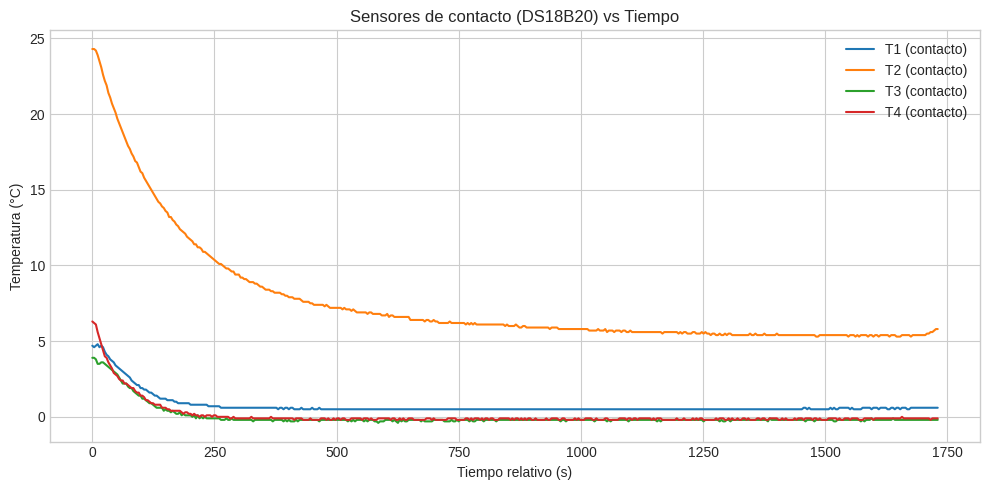

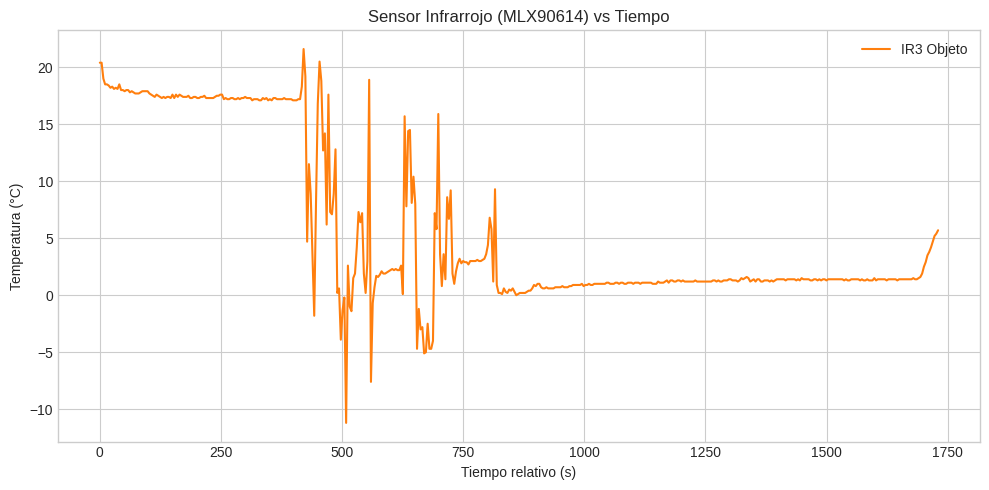

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from datetime import datetime

# ---------- CONFIGURACIÓN ----------
input_file = "contacto_directo.csv"
output_file = "temperaturas7.csv"

# ---------- LECTURA Y PROCESAMIENTO ----------
with open(input_file, "r", encoding="latin-1") as f:
    lines = f.readlines()

data = []
current_time = None
IR3_Obj, IR3_Amb = None, None

# Patrones regulares
pat_time = re.compile(r"(\d{2}:\d{2}:\d{2}\.\d{3})")
pat_ir3 = re.compile(r"IR Canal 3:\s*Obj\s*=\s*([\dnan.-]+)\s*°C,\s*Amb\s*=\s*([\dnan.-]+)\s*°C")
pat_ds18b20 = re.compile(
    r"DS18B20:\s*T1\s*=\s*([\d.-]+)\s*°C\s*\|\s*T2\s*=\s*([\d.-]+)\s*°C\s*\|\s*T3\s*=\s*([\d.-]+)\s*°C\s*\|\s*T4\s*=\s*([\d.-]+)\s*°C"
)

for line in lines:
    # Detectar tiempo (nuevo bloque)
    if "->" in line:
        m_time = pat_time.search(line)
        if m_time:
            current_time = m_time.group(1)

    # Leer línea de IR Canal 3
    m_ir3 = pat_ir3.search(line)
    if m_ir3:
        IR3_Obj, IR3_Amb = m_ir3.groups()

    # Leer línea DS18B20 (última del bloque)
    m_ds = pat_ds18b20.search(line)
    if m_ds and current_time:
        T1, T2, T3, T4 = m_ds.groups()
        data.append({
            "Tiempo": current_time,
            "IR3 Obj (°C)": float(IR3_Obj) if IR3_Obj != "nan" else None,
            "IR3 Amb (°C)": float(IR3_Amb) if IR3_Amb != "nan" else None,
            "T1 (°C)": float(T1),
            "T2 (°C)": float(T2),
            "T3 (°C)": float(T3),
            "T4 (°C)": float(T4),
        })

# Crear DataFrame
df = pd.DataFrame(data)

# ---------- CONVERSIÓN DE TIEMPO ----------
def to_seconds(t):
    dt = datetime.strptime(t, "%H:%M:%S.%f")
    return dt.hour * 3600 + dt.minute * 60 + dt.second + dt.microsecond / 1e6

df["Tiempo (s)"] = df["Tiempo"].apply(to_seconds)
df["Tiempo relativo (s)"] = df["Tiempo (s)"] - df["Tiempo (s)"].iloc[0]

# Guardar CSV
df.to_csv(output_file, index=False)
duracion = df["Tiempo relativo (s)"].iloc[-1]
print(f"Archivo guardado como: {output_file}")
print(f"Duración total: {duracion:.1f} s ({duracion/60:.2f} min)")

# ---------- GRAFICAR ----------
plt.style.use('seaborn-v0_8-whitegrid')

# --- Sensores de contacto ---
plt.figure(figsize=(10,5))
plt.plot(df["Tiempo relativo (s)"], df["T1 (°C)"], label="T1 (contacto)")
plt.plot(df["Tiempo relativo (s)"], df["T2 (°C)"], label="T2 (contacto)")
plt.plot(df["Tiempo relativo (s)"], df["T3 (°C)"], label="T3 (contacto)")
plt.plot(df["Tiempo relativo (s)"], df["T4 (°C)"], label="T4 (contacto)")
plt.xlabel("Tiempo relativo (s)")
plt.ylabel("Temperatura (°C)")
plt.title("Sensores de contacto (DS18B20) vs Tiempo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Sensor infrarrojo ---
plt.figure(figsize=(10,5))
plt.plot(df["Tiempo relativo (s)"], df["IR3 Obj (°C)"], label="IR3 Objeto", color='tab:orange')
plt.xlabel("Tiempo relativo (s)")
plt.ylabel("Temperatura (°C)")
plt.title("Sensor Infrarrojo (MLX90614) vs Tiempo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
